In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from datasets import GermanWeatherEnergyData

In [2]:
data_dir = "../data/"
# target indices: 63 photovoltaic supply, 62 wind onshore supply, 61 wind offshore supply
photovoltaic_idx = 63
wind_onshore_idx = 62
wind_offshore_idx = 61
window_size = 24 * 3 # 3 days

In [3]:
start_date_str = '2022-01-01 00:00:00'
end_date_str = '2022-03-30 23:00:00'
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Generate the date range with a step of one hour
date_range = pd.date_range(start=start_date, end=end_date, freq='h')

# Convert the date range to a list if needed
# date_list = date_range.to_list()


In [4]:
len(date_range)

2136

# Photovoltaics

In [5]:
gwe = GermanWeatherEnergyData(data_dir=data_dir, window_size= window_size, target_idx=photovoltaic_idx, short_horizon=1, long_horizon=24) 
train,val, test = gwe.get_train_val_test_data()
X_train, y_train = train
X_test, y_test = test
X_val, y_val = val
(short_train, long_train) = gwe.prepare_data(X_train.drop(columns=['time']), y_train)
(short_test, long_test) = gwe.prepare_data(X_test.drop(columns=['time']), y_test)
(short_val, long_val) = gwe.prepare_data(X_val.drop(columns=['time']), y_val)

Loading and preprocessing data...
Loaded weather data in 6.60 seconds.
Loaded energy data in 0.79 seconds.
Merged realisation data in 0.02 seconds.
Converted to datetime format in 0.65 seconds.
Converted energy data to UTC in 0.03 seconds.
Filled missing weather data in 0.16 seconds.
Clustered and aggregated locations in 37.39 seconds.
Filled missing energy data in 37.40 seconds.
Combined weather and energy data in 0.02 seconds.
Split time into integers in 0.03 seconds.
Processed data generated successfully.
From function get_train_val_test_data:
photovoltaic_supply


In [6]:
pred_photo_short = np.load('../predictions/photovoltaics/y_pred_short_test_photo.npy')
pred_photo_long = np.load('../predictions/photovoltaics/y_pred_long_test_photo.npy')
print(pred_photo_short.shape)
print(pred_photo_long.shape)

(8641,)
(8641,)


In [7]:
pred_photo_short_slice = pred_photo_short[:len(date_range)]
pred_photo_long_slice = pred_photo_long[:len(date_range)]

In [8]:
def plot_predictions(date_range, y_true, y_pred_short, y_pred_long, title_short_hor, title_long_hor, ylabel, fig_title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
    fontsize = 20  
    # Plot the short prediction
    ax1.plot(date_range, y_pred_short, label='Predicted', color='red')
    ax1.plot(date_range, y_true[:len(date_range)], label='True', color='blue')
    ax1.set_ylabel(ylabel, fontsize=fontsize)
    ax1.set_title(title_short_hor, fontsize=fontsize)
    ax1.legend(fontsize=fontsize)
    ax1.tick_params(axis='both', which='major', labelsize=fontsize)
    ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False, labelsize = fontsize)  # Remove x-axis ticks

    # Plot the long prediction
    ax2.plot(date_range, y_pred_long, label='Predicted', color='red')
    ax2.plot(date_range, y_true[:len(date_range)], label='True', color='blue')
    ax2.set_xlabel('Date', fontsize=fontsize)
    ax2.set_ylabel(ylabel, fontsize=fontsize)
    ax2.set_title(title_long_hor, fontsize=fontsize)
    ax2.legend(fontsize=fontsize)
    ax2.tick_params(axis='both', which='major', labelsize = fontsize)

    plt.tight_layout()
    folder_path = "../figures"
    file_path = os.path.join(folder_path, fig_title)
    plt.savefig(file_path)
    plt.show()

    

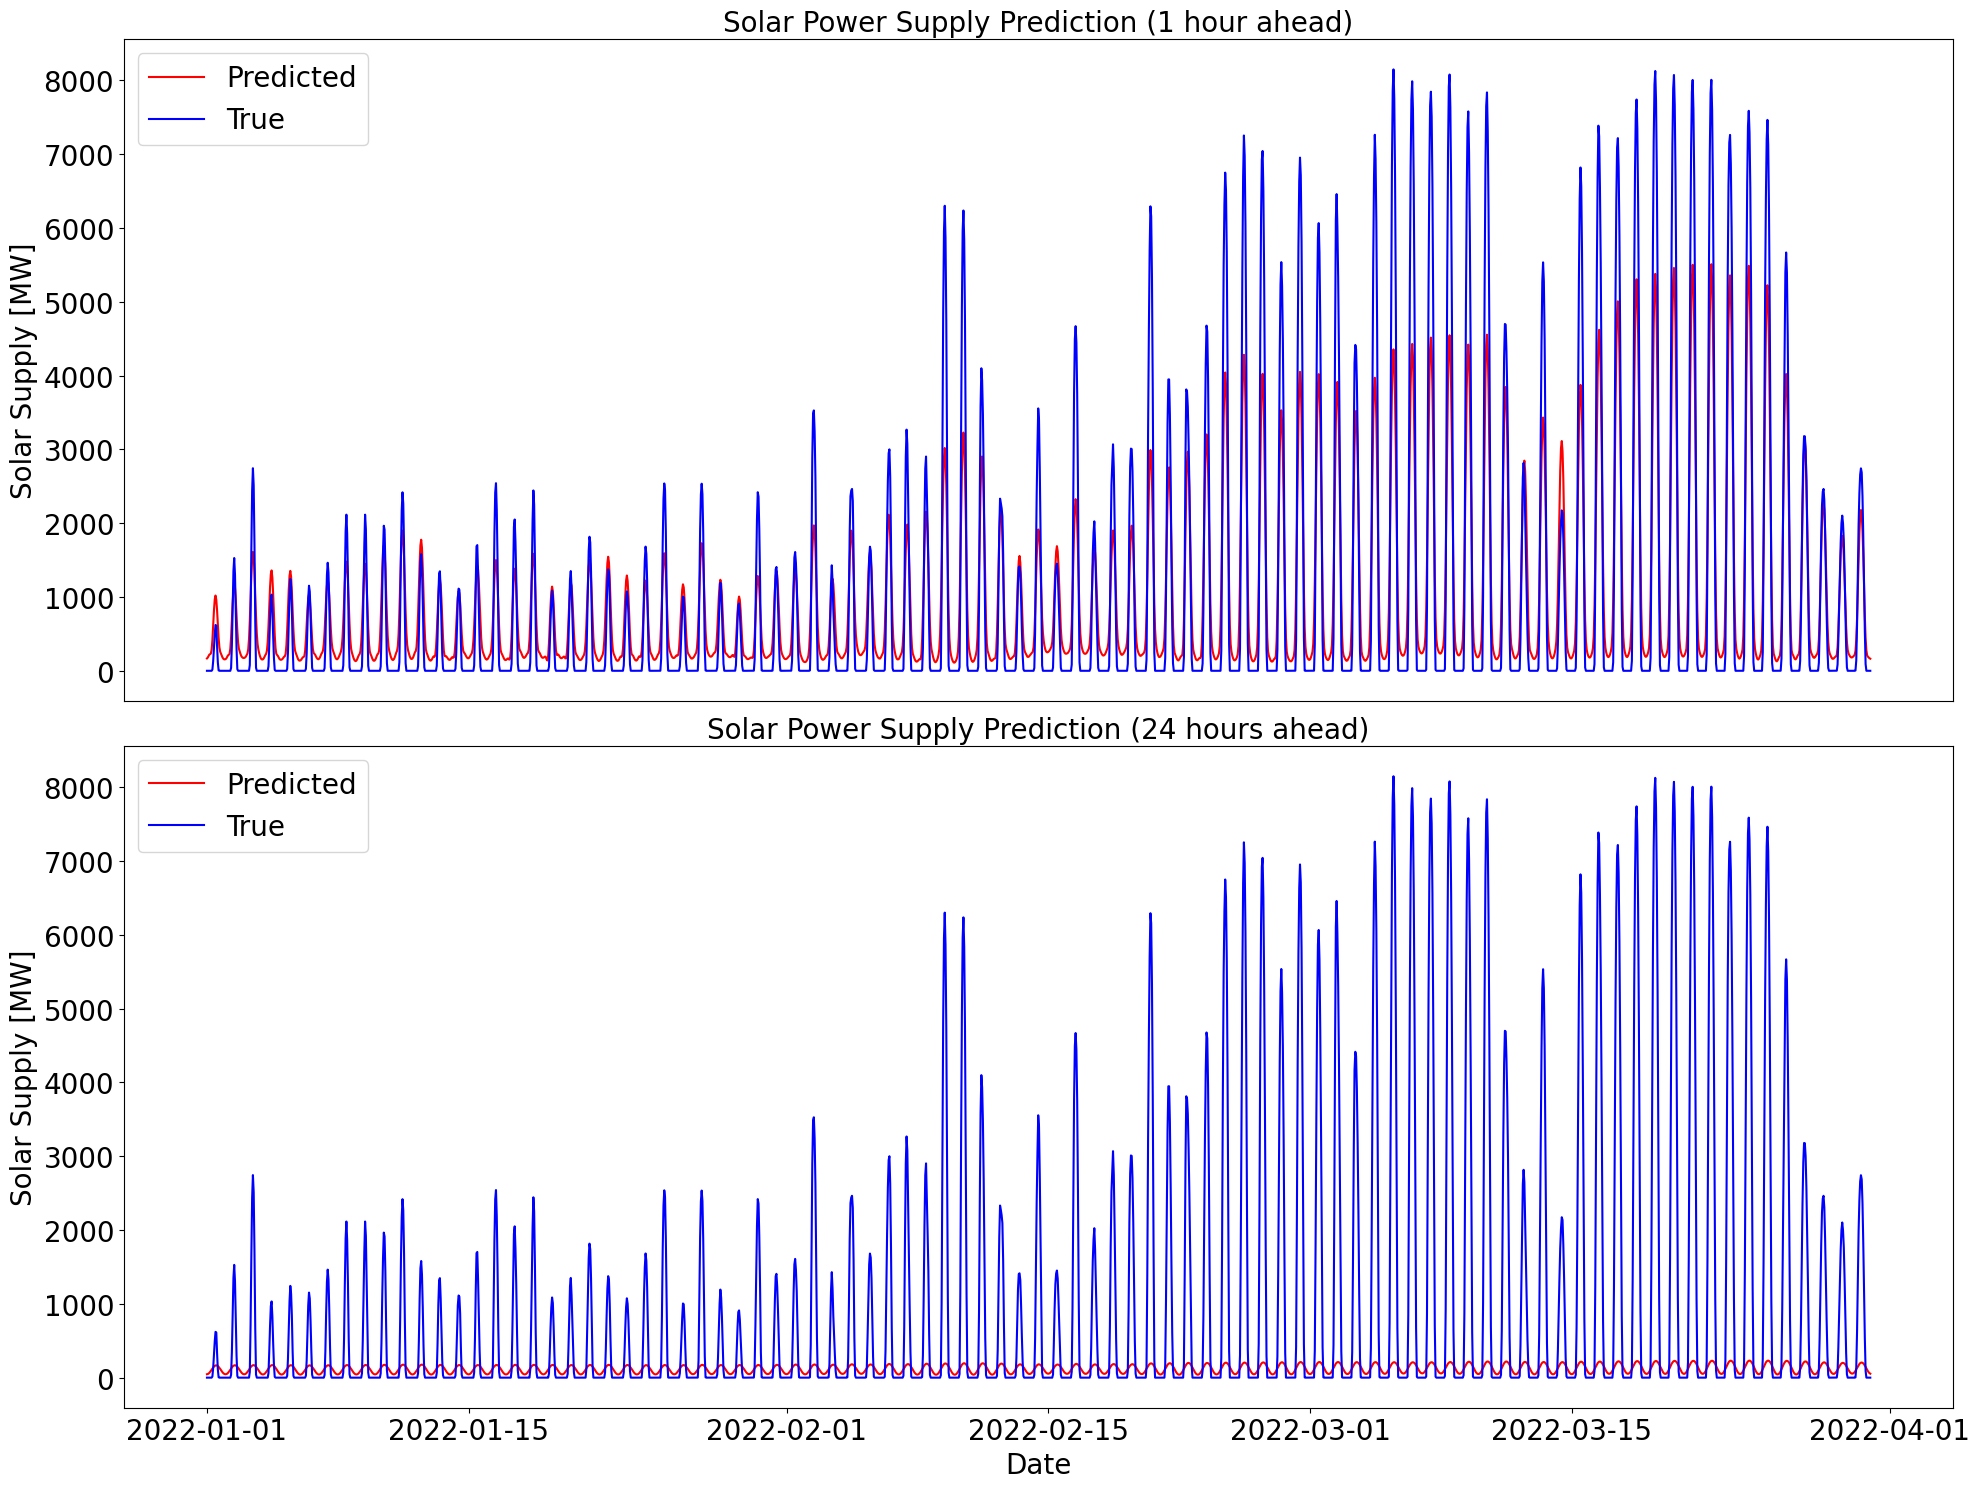

In [9]:
plot_predictions(date_range, short_test[1], pred_photo_short_slice, pred_photo_long_slice, 'Solar Power Supply Prediction (1 hour ahead)', 'Solar Power Supply Prediction (24 hours ahead)', 'Solar Supply [MW]', 'solar_prediction.png')

# Wind onshore

In [10]:
gwe = GermanWeatherEnergy(data_dir=data_dir, window_size= window_size, target_idx=wind_onshore_idx, short_horizon=1, long_horizon=24) 
train,val, test = gwe.get_train_val_test_data()
X_train, y_train = train
X_test, y_test = test
X_val, y_val = val
(short_train, long_train) = gwe.prepare_data(X_train.drop(columns=['time']), y_train)
(short_test, long_test) = gwe.prepare_data(X_test.drop(columns=['time']), y_test)
(short_val, long_val) = gwe.prepare_data(X_val.drop(columns=['time']), y_val)

Loading and preprocessing data...
Loaded weather data in 7.50 seconds.
Loaded energy data in 0.85 seconds.
Merged realisation data in 0.02 seconds.
Converted to datetime format in 0.73 seconds.
Converted energy data to UTC in 0.02 seconds.
Filled missing weather data in 0.25 seconds.
Clustered and aggregated locations in 36.41 seconds.
Filled missing energy data in 36.43 seconds.
Combined weather and energy data in 0.02 seconds.
Split time into integers in 0.02 seconds.
Processed data generated successfully.
From function get_train_val_test_data:
wind_onshore_supply


In [11]:
pred_onshore_short = np.load('../predictions/wind_onshore/y_pred_short_test_onshore.npy')
pred_onshore_long = np.load('../predictions/wind_onshore/y_pred_long_test_onshore.npy')
print(pred_onshore_short.shape)
print(pred_onshore_long.shape)

(8641,)
(8641,)


In [12]:
pred_onshore_short_slice = pred_onshore_short[:len(date_range)]
pred_onshore_long_slice = pred_onshore_long[:len(date_range)]

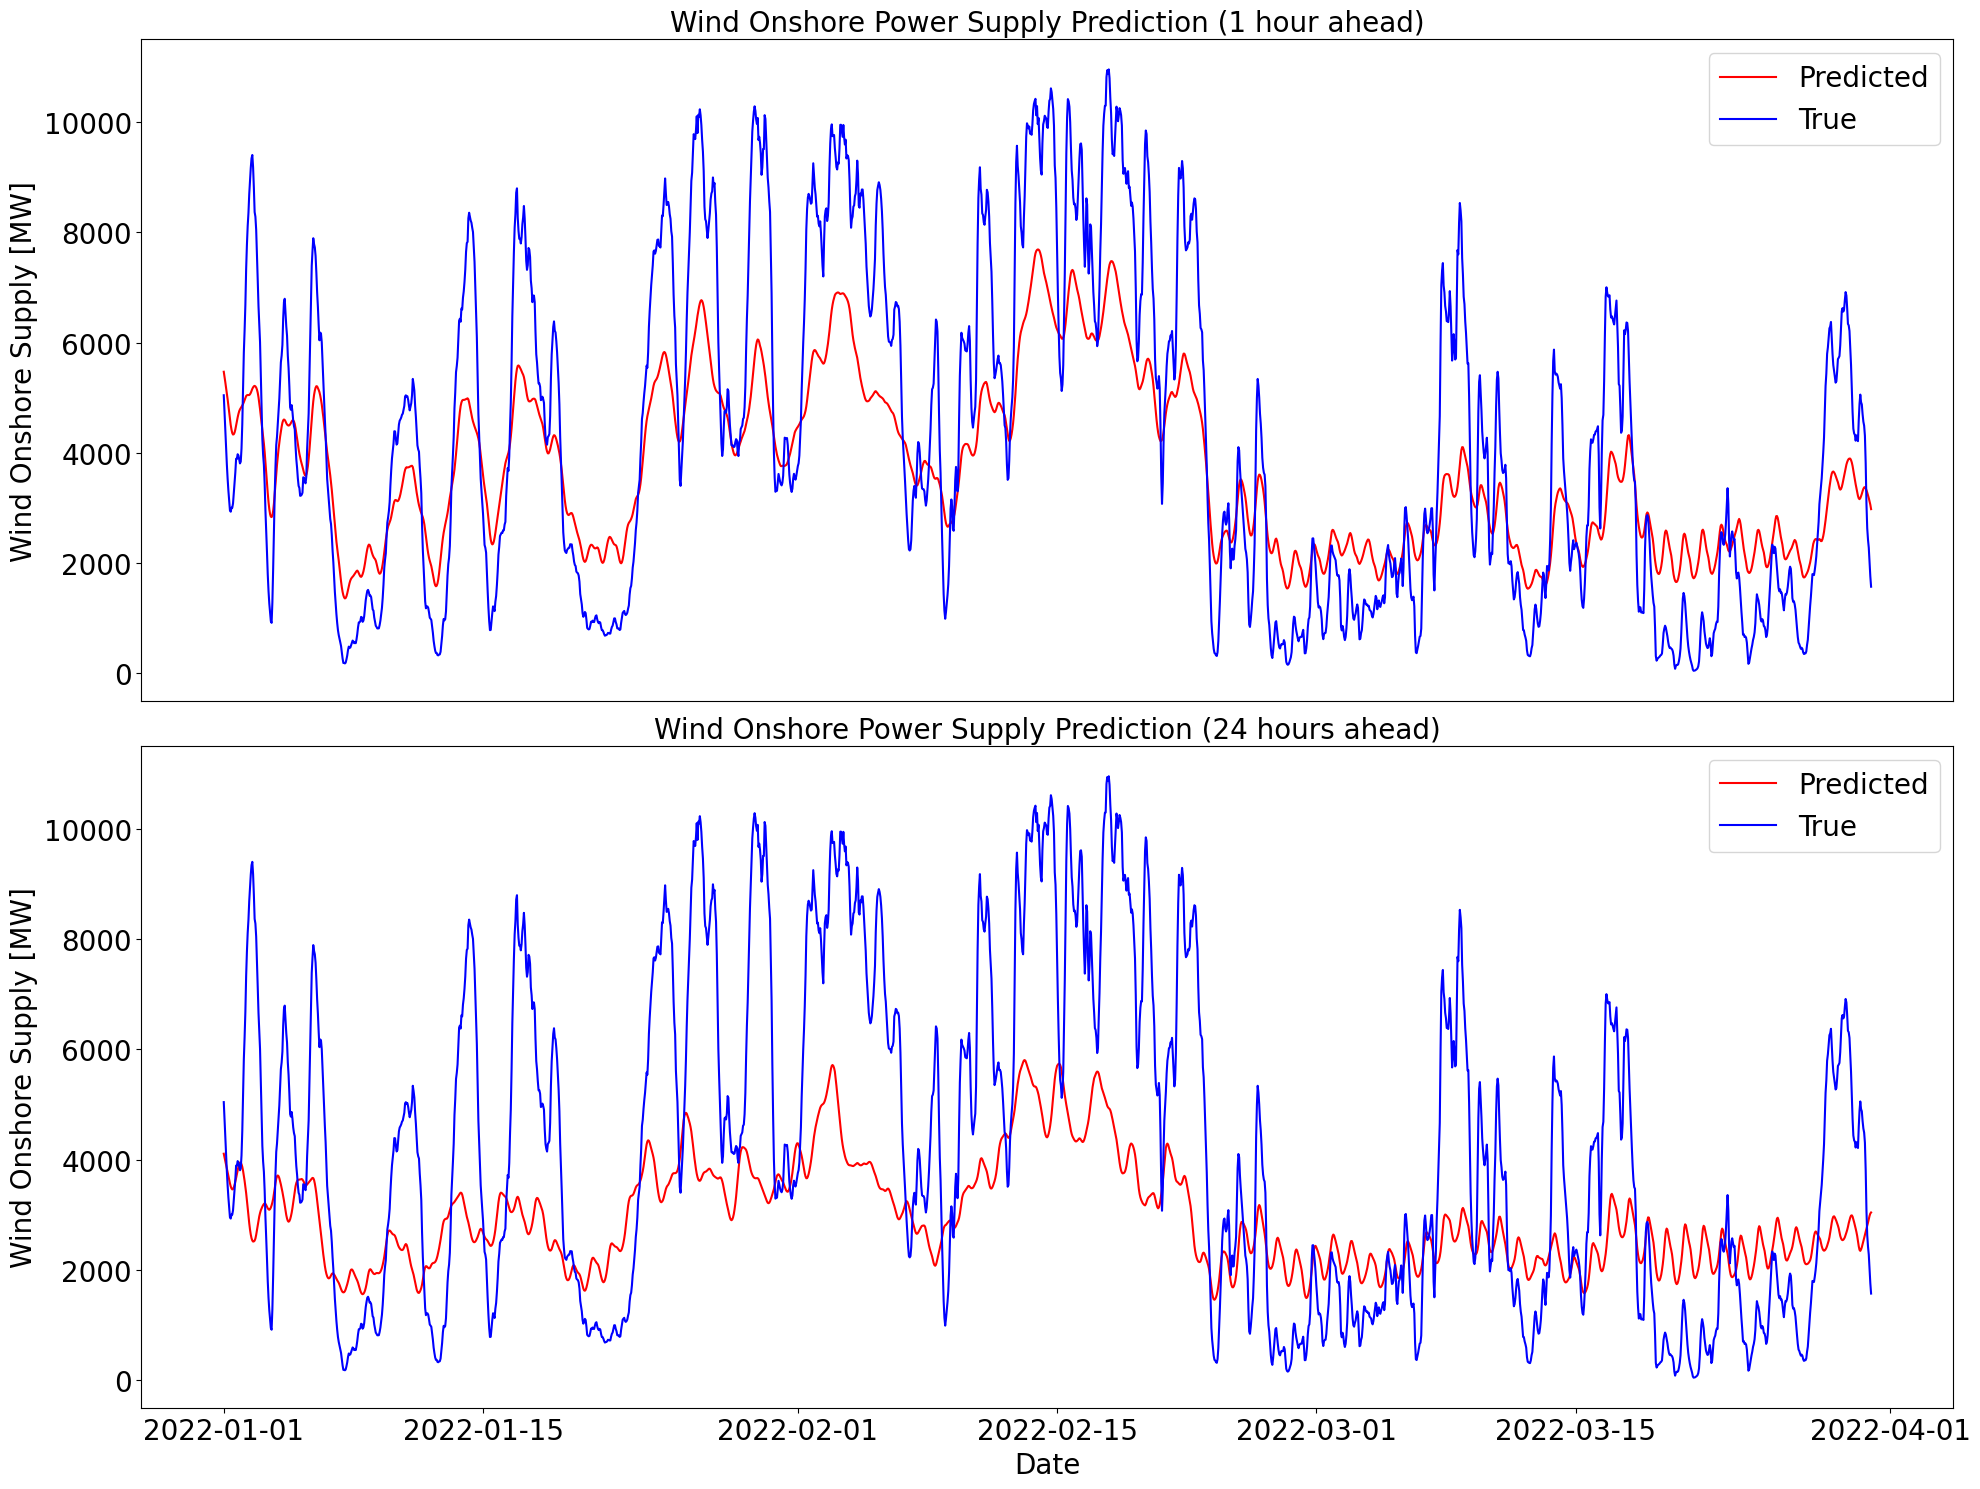

In [13]:
plot_predictions(date_range, short_test[1], pred_onshore_short_slice, pred_onshore_long_slice, 'Wind Onshore Power Supply Prediction (1 hour ahead)', 'Wind Onshore Power Supply Prediction (24 hours ahead)', 'Wind Onshore Supply [MW]', 'wind_onshore_prediction.png')

# Wind offshore

In [14]:
gwe = GermanWeatherEnergy(data_dir=data_dir, window_size= window_size, target_idx=wind_offshore_idx, short_horizon=1, long_horizon=24) 
train,val, test = gwe.get_train_val_test_data()
X_train, y_train = train
X_test, y_test = test
X_val, y_val = val
(short_train, long_train) = gwe.prepare_data(X_train.drop(columns=['time']), y_train)
(short_test, long_test) = gwe.prepare_data(X_test.drop(columns=['time']), y_test)
(short_val, long_val) = gwe.prepare_data(X_val.drop(columns=['time']), y_val)

Loading and preprocessing data...
Loaded weather data in 8.26 seconds.
Loaded energy data in 0.84 seconds.
Merged realisation data in 0.02 seconds.
Converted to datetime format in 0.68 seconds.
Converted energy data to UTC in 0.03 seconds.
Filled missing weather data in 0.17 seconds.
Clustered and aggregated locations in 36.29 seconds.
Filled missing energy data in 36.31 seconds.
Combined weather and energy data in 0.02 seconds.
Split time into integers in 0.02 seconds.
Processed data generated successfully.
From function get_train_val_test_data:
wind_offshore_supply


In [15]:
pred_offshore_short = np.load('../predictions/wind_offshore/y_pred_short_test_offshore.npy')
pred_offshore_long = np.load('../predictions/wind_offshore/y_pred_long_test_offshore.npy')
print(pred_offshore_short.shape)
print(pred_offshore_long.shape)

(8641,)
(8641,)


In [16]:
pred_offshore_short_slice = pred_offshore_short[:len(date_range)]
pred_offshore_long_slice = pred_offshore_long[:len(date_range)]

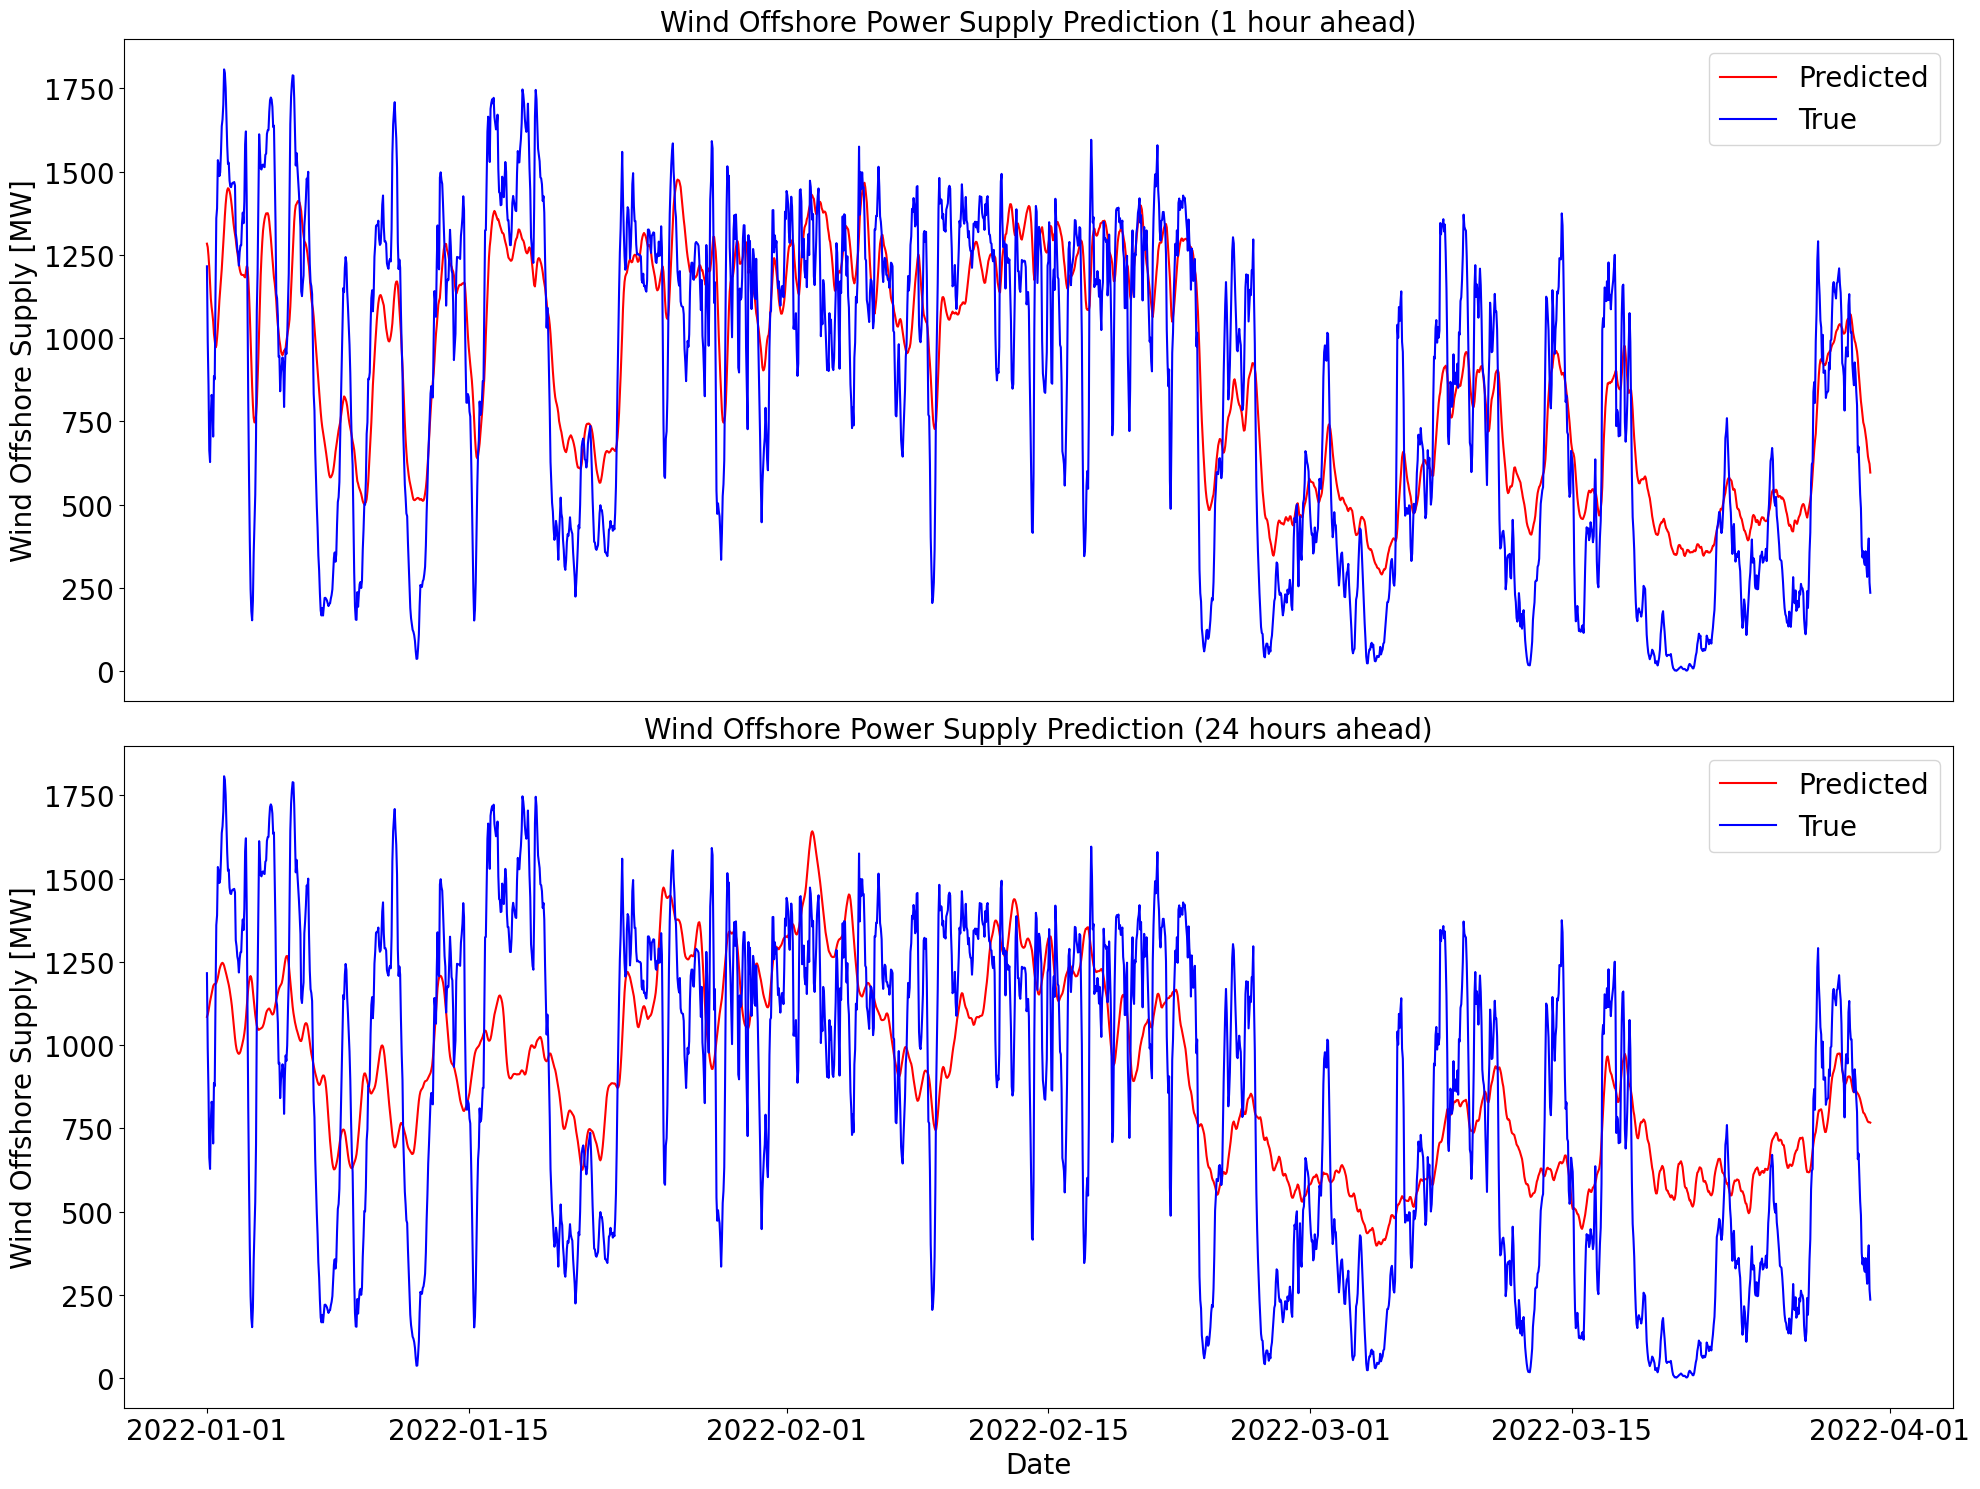

In [17]:
plot_predictions(date_range, short_test[1], pred_offshore_short_slice, pred_offshore_long_slice, 'Wind Offshore Power Supply Prediction (1 hour ahead)', 'Wind Offshore Power Supply Prediction (24 hours ahead)', 'Wind Offshore Supply [MW]', 'wind_offshore_prediction.png')